# Plot Caked Patterns from dpp files from PeakPo

- Please check [setup_for_notebooks](../0_setup/setup_for_notebooks.ipynb) file if you have problem using the notebooks in this folder.  
- In this notebook, we will learn how to plot XRD patterns using the information saved in `dpp`.  
- `dpp` is a project file saved in `PeakPo`.  You may plot, jcpds information and cake as well as many other information.

This notebook takes advantage of the `PeakPo` modules and other local modules.  They can be found in `../local_modules` folder.  
The cell below defined the search path for this local module folder.

In [ ]:
import sys
sys.path.append('../../peakpo')
sys.path.append('../local_modules')

## Check the versio of pyFAI in your conda environment

In [2]:
import pyFAI
pyFAI.version

'0.14.2'

Note that the example data files I provided are made with `pyFAI` version `0.14`.  If you see version higher than `0.15` here, you will get error when you read the example `dpp` file.  In that case, you either follow the instruction in [setup_for_notebooks.ipynb](./setup_for_notebooks.ipynb) or you may use your own dpp for this note book.

## Read dpp

In [3]:
import dill
import numpy as np

Change the following two cells for your own dpp file

Data files should be in the `./data` folder.  You need: `dpp`, `chi`, and `tif`.

In [4]:
%ls ../data/*.dpp

../data/hSiO2_404_009.dpp


In [5]:
filen_dpp = '../data/hSiO2_404_009.dpp'

In [6]:
with open(filen_dpp, 'rb') as f:
    model_dpp = dill.load(f)

The cells below show how to look into the data structure of the `model_dpp` and get values from it.

## Setup a new PeakPo model and assign info from dpp

In [7]:
from model import PeakPoModel
model = PeakPoModel()

Make sure to reset the chi folder location using the `new_chi_path` option.

In [8]:
model.set_from(model_dpp, new_chi_path='../data')

## Make XRD plot

In [9]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Let's make some plots

In the plot below, we plot diffraction pattern in $2\theta$ scale to prevent any distortion in the diffraction pattern.  We just plot tickmarks in d-spacing scale.

In [10]:
import fancy_plots as fancy

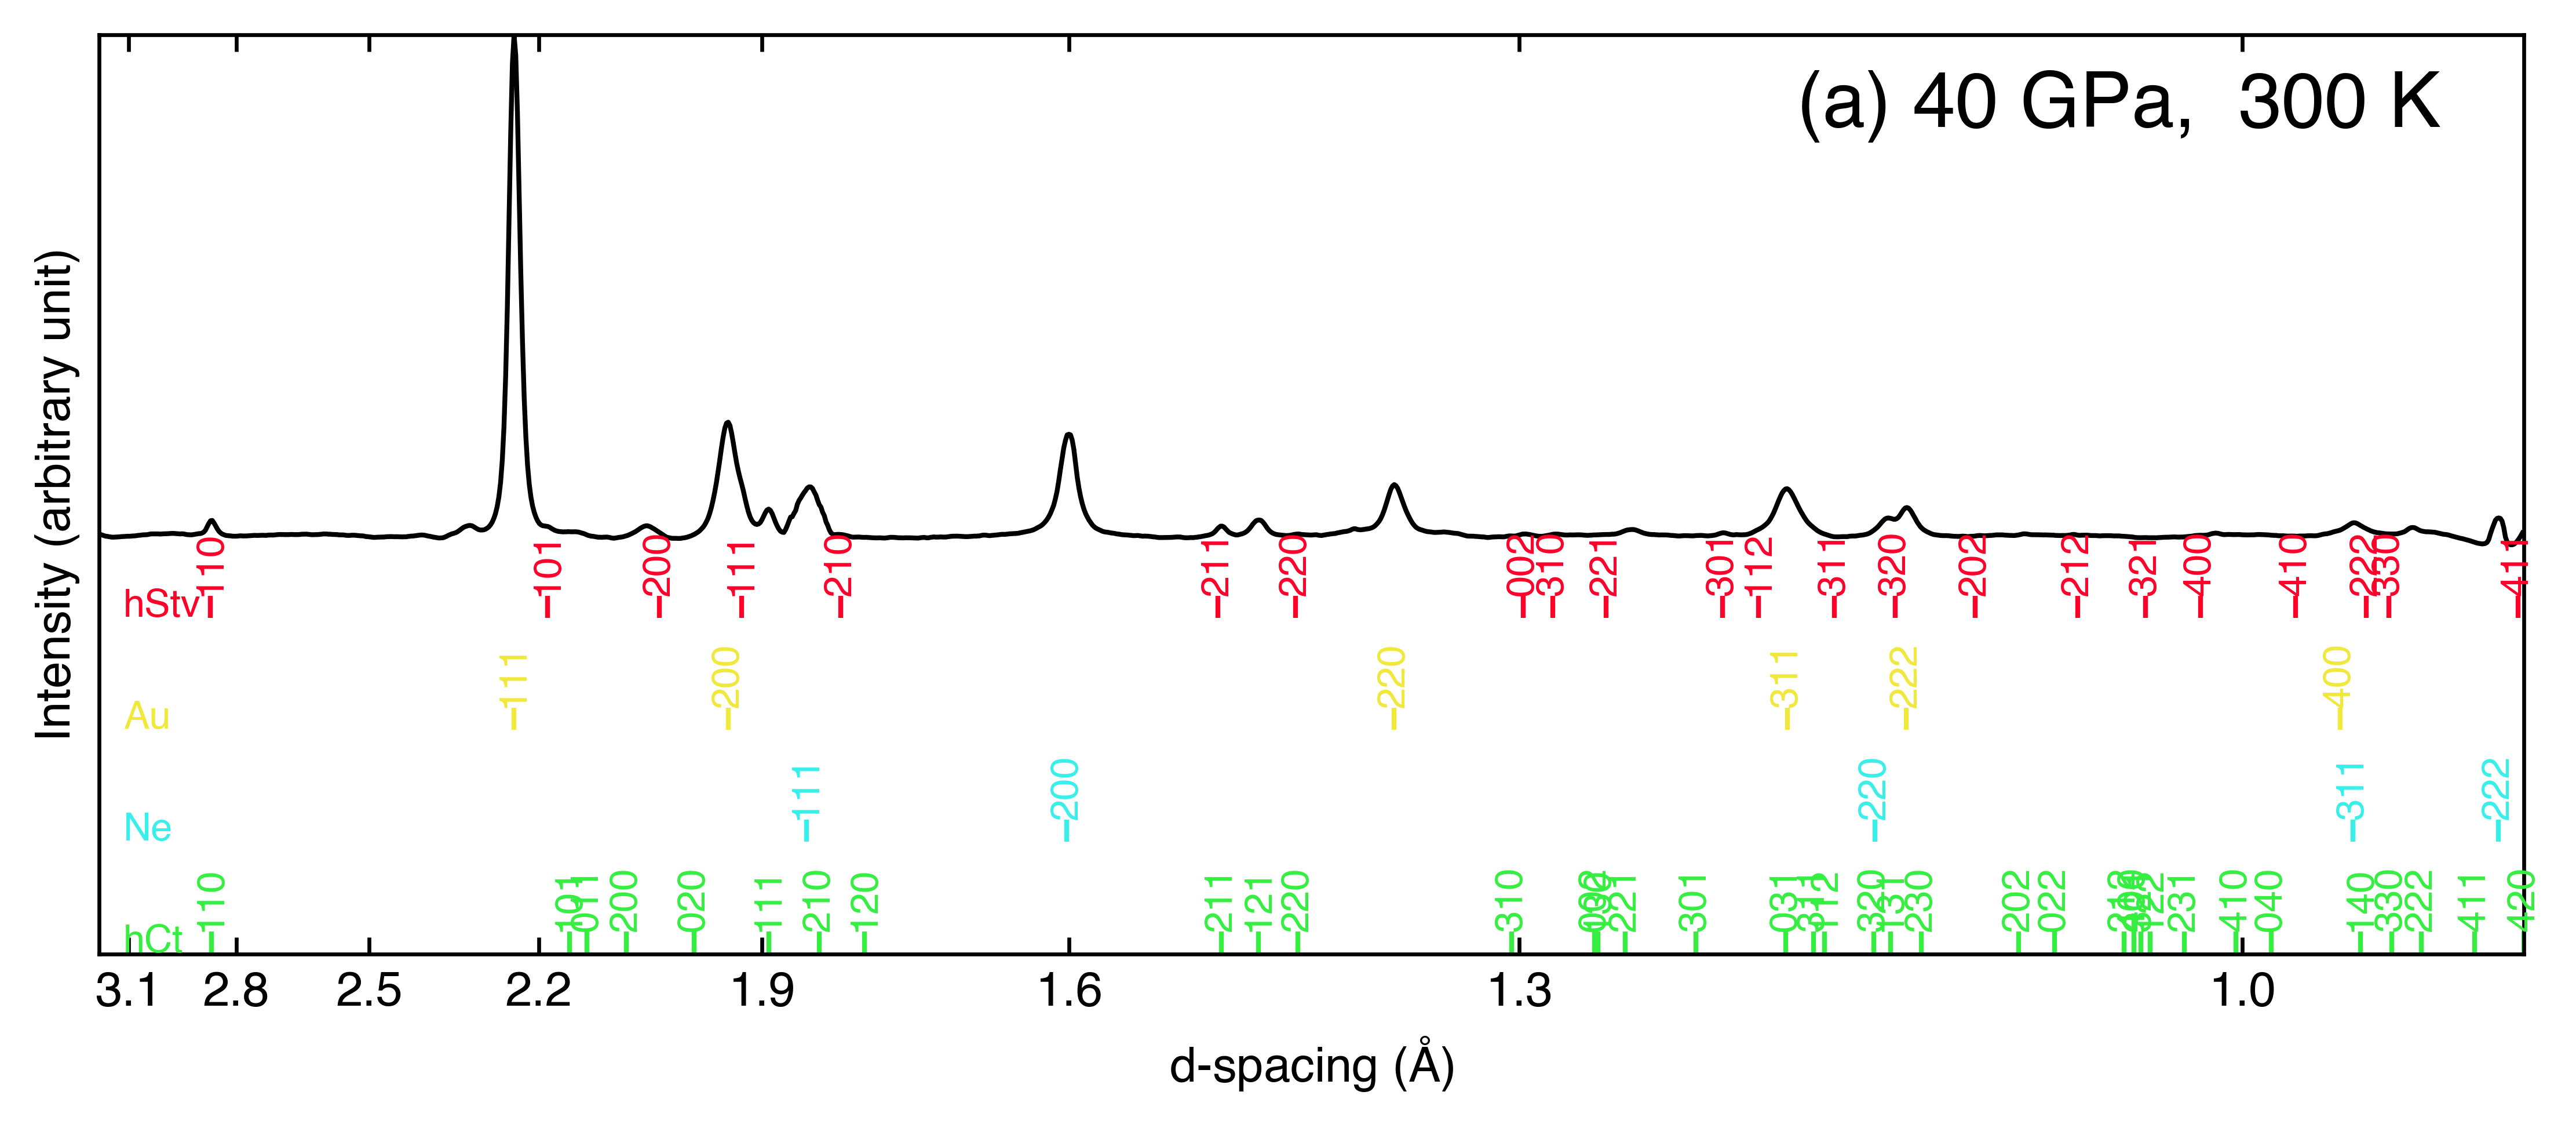

In [11]:
f, ax = plt.subplots(figsize=(9,3.5), dpi=300)
fancy.plot_diffpattern(ax, model, dsp_ticks=True, dsp_step=0.3)
fancy.plot_jcpds(ax, model, bar_position=0.1, bar_height=5, 
           show_index=True, 
           phase_names = ['hStv', 'Au', 'Ne', 'hCt'], bar_vsep=5.)
pressure = model.get_saved_pressure()
temperature = model.get_saved_temperature()
ax.text(0.70,0.9, "(a) {0:.0f} GPa, {1: .0f} K".format(pressure, temperature), 
        transform = ax.transAxes, fontsize=16)
plt.savefig('test.pdf', bbox_inches='tight')

## Can I add cake to the diffraction pattern?

In [12]:
model_dpp.__dict__

{'base_ptn': <ds_powdiff.DiffractionPattern.PatternPeakPo at 0x11d9c1f60>,
 'waterfall_ptn': [],
 'jcpds_lst': [<ds_jcpds.jcpds.JCPDSplt at 0x12ae28be0>,
 'ucfit_lst': [],
 'diff_img': <ds_cake.DiffractionImage.DiffImg at 0x12ae25c50>,
 'poni': '../data/LaB6_37keV_p49_center.poni',
 'session': <ds_jcpds.jcpds.Session at 0x12ae36a20>,
 'jcpds_path': '/Users/DanShim/Python/jcpds',
 'chi_path': '../data',
 'current_section': None,
 'section_lst': [],
 'saved_pressure': 39.6,
 'saved_temperature': 300.0}

In [13]:
#model_dpp.__dict__['diff_img'].__dict__

In [14]:
intensity_cake = model_dpp.__dict__['diff_img'].__dict__['intensity_cake']
tth_cake = model_dpp.__dict__['diff_img'].__dict__['tth_cake']
chi_cake = model_dpp.__dict__['diff_img'].__dict__['chi_cake']
intensity_cake.shape

(360, 5808)

In [15]:
print(tth_cake)

[2.60987346e-03 7.82961977e-03 1.30493661e-02 ... 3.03032372e+01
 3.03084569e+01 3.03136767e+01]


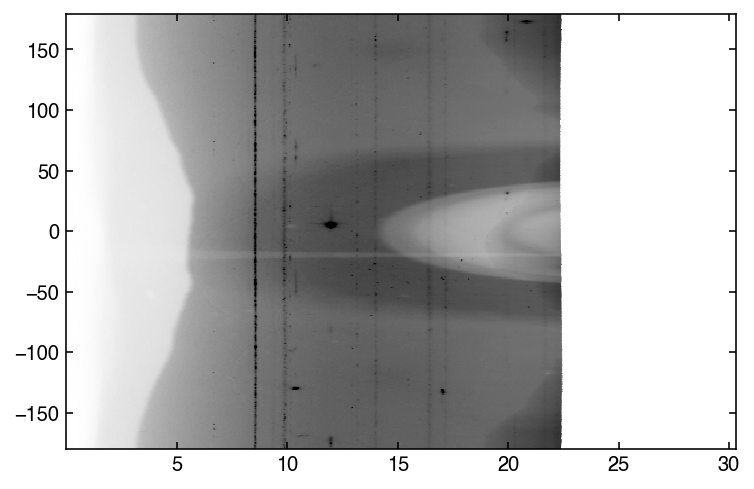

In [16]:
plt.imshow(intensity_cake, origin="lower", 
                   extent=[tth_cake.min(), tth_cake.max(), 
                           chi_cake.min(), chi_cake.max()], 
           aspect="auto", cmap="gray_r", clim=(1.e2, 7.e3))
#plt.xlim(0,20)

## Modify plot_diffpattern function to plot cake

In [17]:
from xrd_unitconv import *

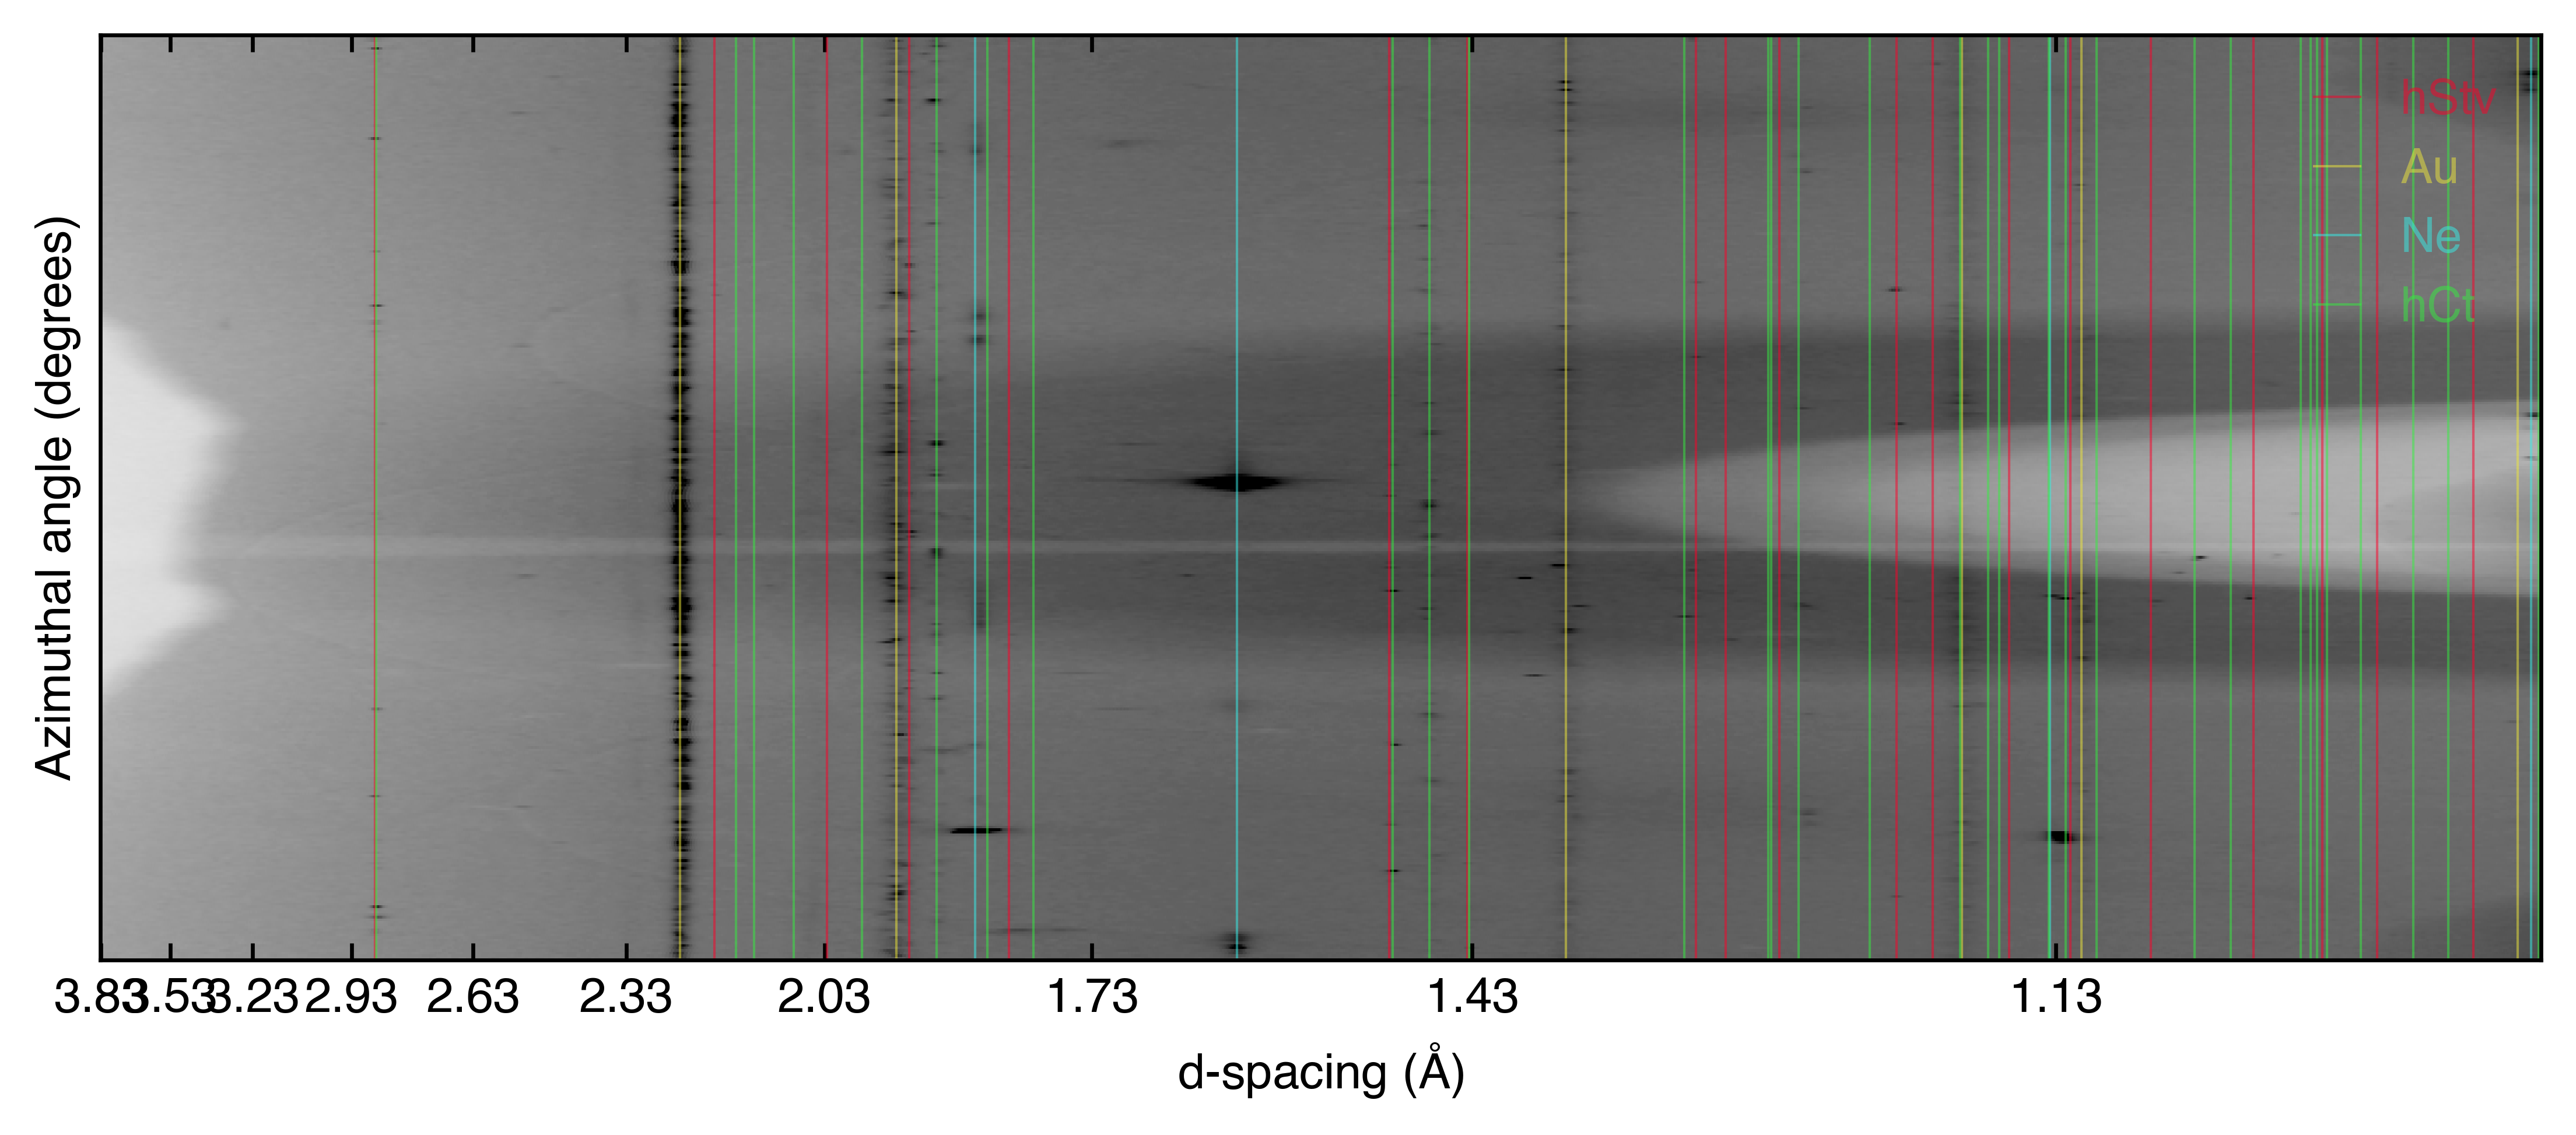

In [18]:
f, ax = plt.subplots(figsize=(9,3.5), dpi=300)
fancy.plot_diffcake(ax, model_dpp, dsp_ticks=True, dsp_step=0.3)
fancy.plot_jcpds(ax, model, 
           show_index=False, in_cake=True, show_legend=True,
           phase_names = ['hStv', 'Au', 'Ne', 'hCt'],
                bar_alpha=0.5, bar_thick=0.5)
#print(ax.axis())
#pressure = model.get_saved_pressure()
#temperature = model.get_saved_temperature()
#ax.text(0.70,0.9, "(a) {0:.0f} GPa, {1: .0f} K".format(pressure, temperature), 
#        transform = ax.transAxes, fontsize=16)
#plt.savefig('test.pdf', bbox_inches='tight')

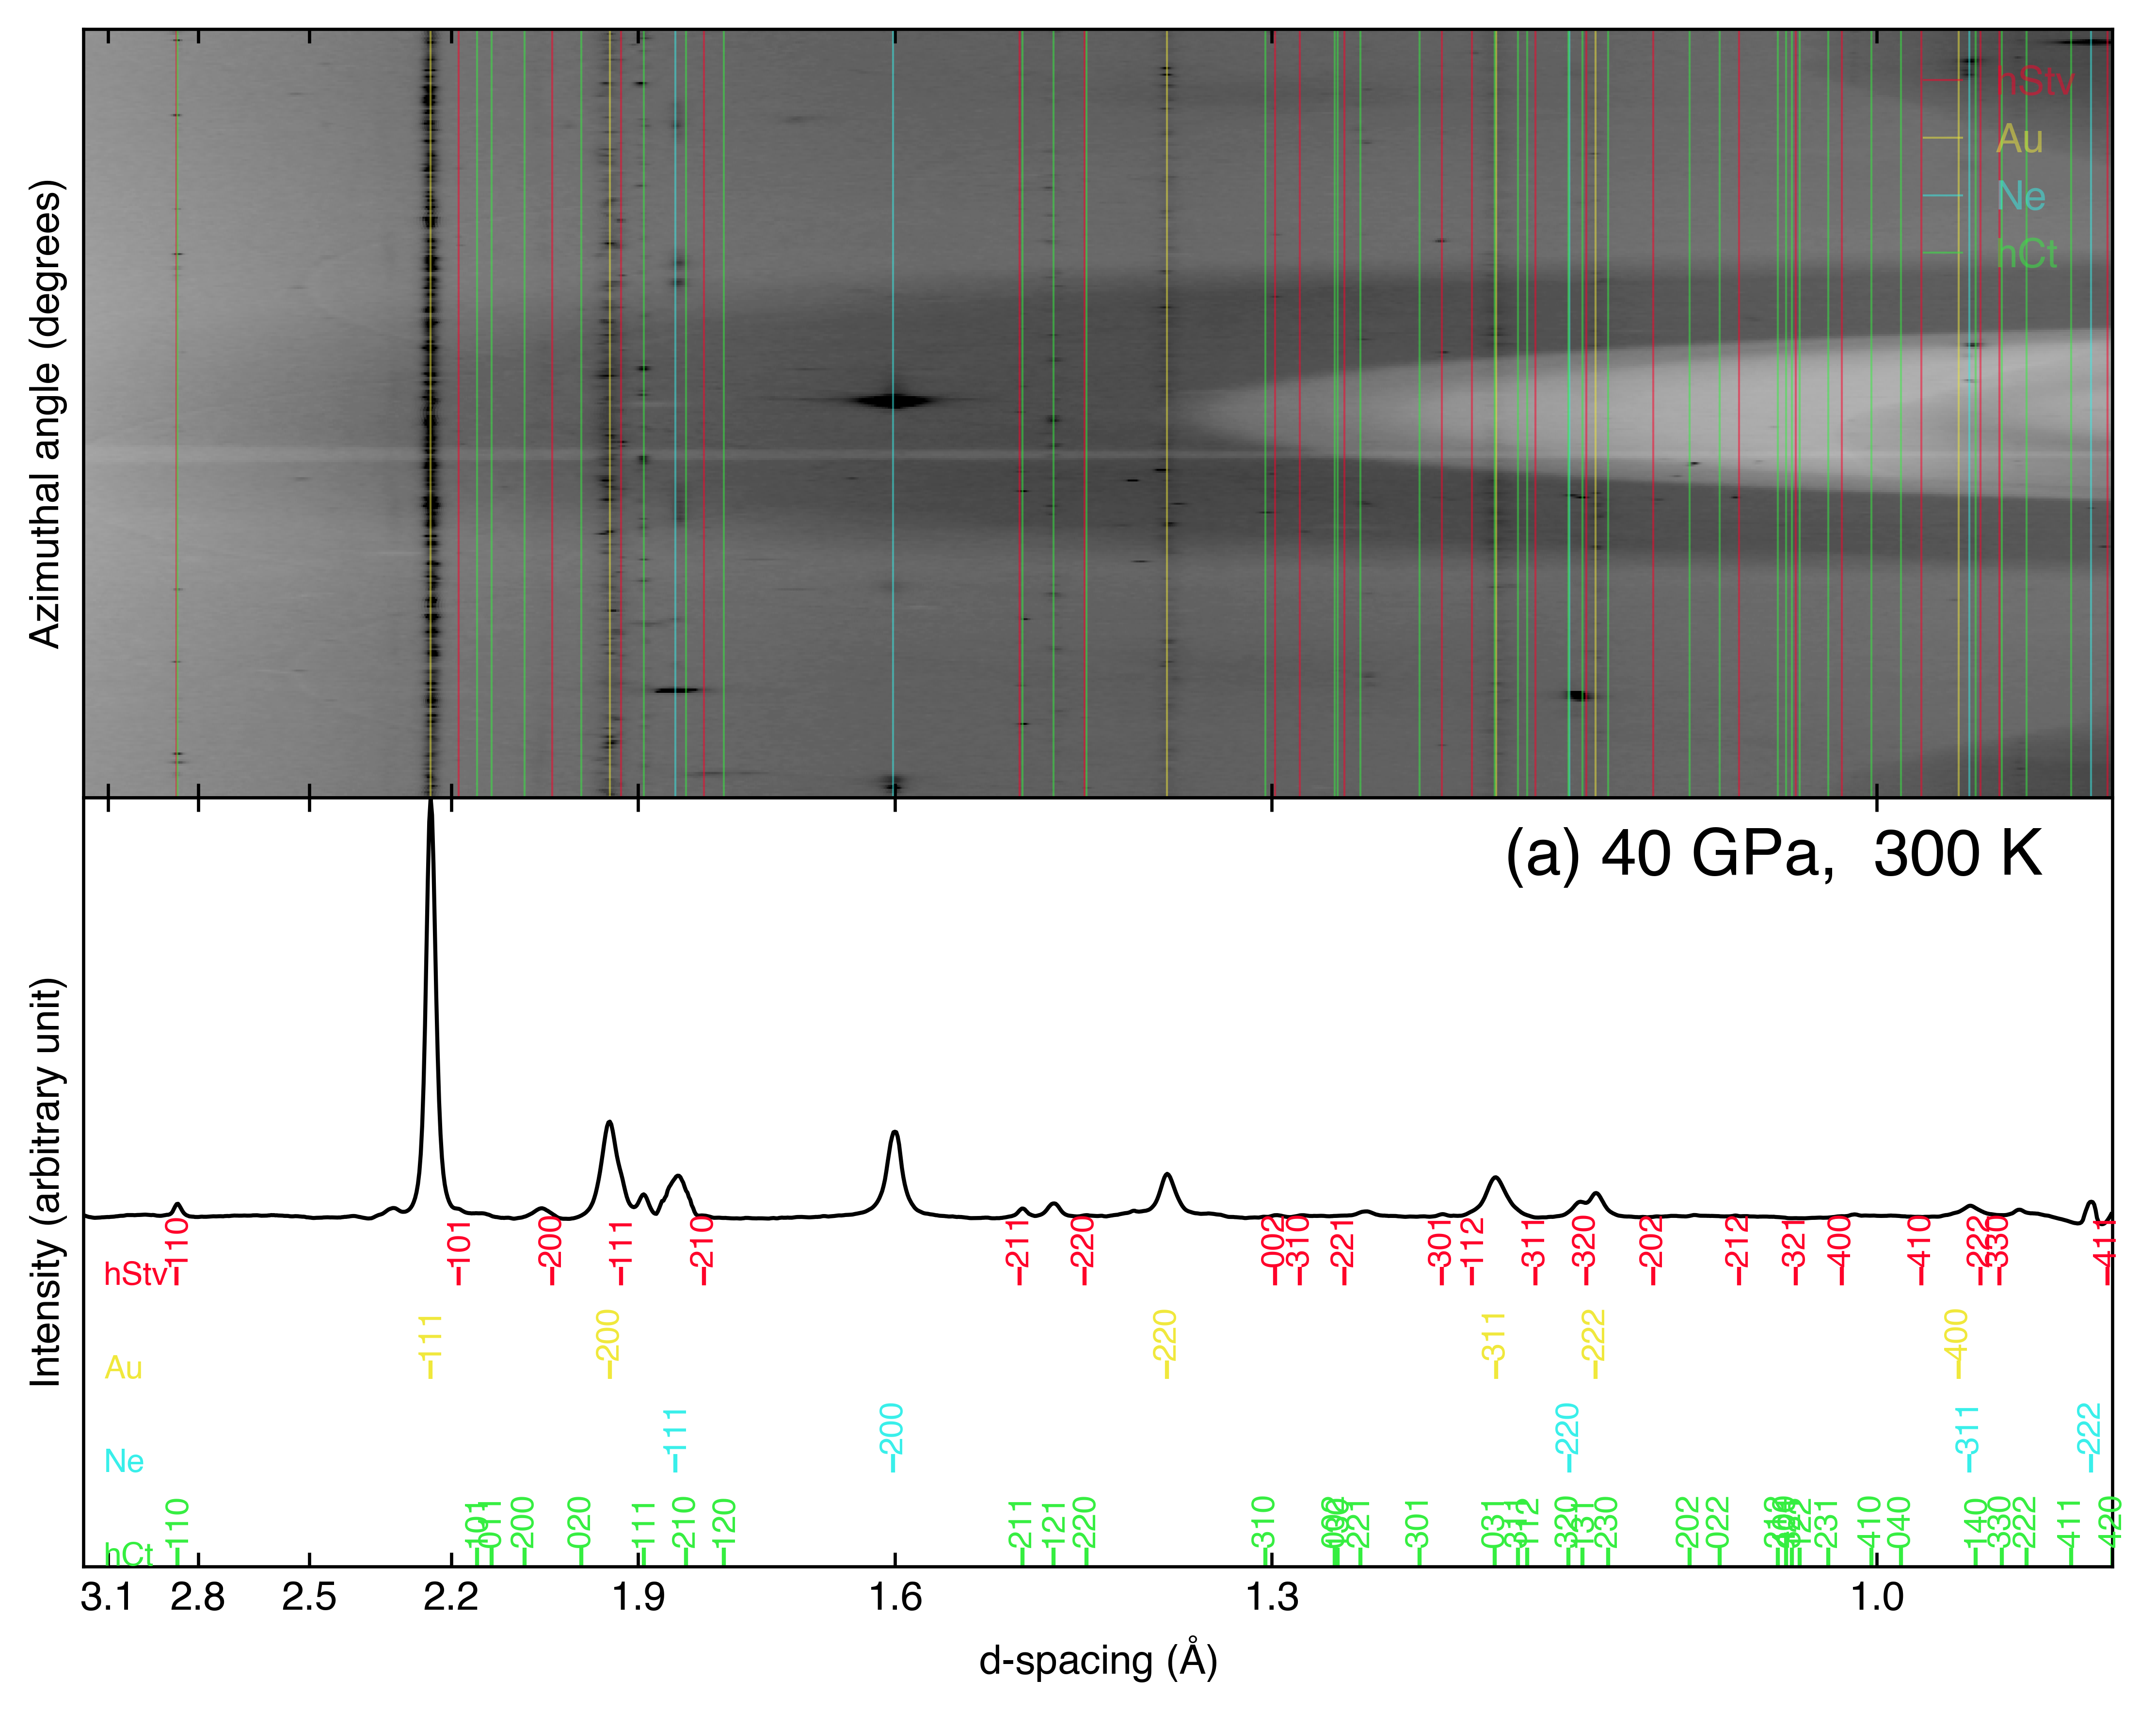

In [19]:
f, axs = plt.subplots(2, 1, figsize=(9,7.), dpi=300, sharex=True)
fancy.plot_diffcake(axs[0], model_dpp, dsp_ticks=True, 
                    no_xlabel=True, dsp_step=0.3)
fancy.plot_jcpds(axs[0], model, 
           show_index=False, in_cake=True, show_legend=True,
           phase_names = ['hStv', 'Au', 'Ne', 'hCt'],
                bar_alpha=0.5, bar_thick=0.5)
fancy.plot_diffpattern(axs[1], model, dsp_ticks=True, dsp_step=0.3)
fancy.plot_jcpds(axs[1], model, bar_position=0.1, bar_height=5, 
           show_index=True, 
           phase_names = ['hStv', 'Au', 'Ne', 'hCt'], bar_vsep=5.)
pressure = model.get_saved_pressure()
temperature = model.get_saved_temperature()
axs[1].text(0.7,0.9, "(a) {0:.0f} GPa, {1: .0f} K".format(pressure, temperature), 
        transform = axs[1].transAxes, fontsize=16)
plt.subplots_adjust(hspace=0)
plt.savefig('test.pdf', bbox_inches='tight')